# Data Analysis in Python Using Pandas
### by Ethan Orlowsky
#### Credits to Pandas.org and Quantopian.com for the content in this Workshop

## Goals:
This workbook takes you through a guided example of the steps you should take when analyzing datasets for your projects. The outcomes of this workshop are:
- Making calculations on your dataset
- Visualizing data and finding trends in your dataset

## Research Question: How accurate are NFL predraft rankings of prospects?
<img src='images\grading_scale.png' style='width:1500px'><img src='images\baker.png' style='width:1500px'>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
player_grades = pd.read_csv('data\player_grades.csv')
player_stats = pd.read_csv('data\player_stats.csv')

In [40]:
player_grades.head(5)

,year,name,college,position,grade
0,2014,Jonotthan Harrison,FLORIDA,C,5.8
1,2014,Victor Hampton,SOUTH CAROLINA,CB,5.8
2,2014,Andre Hal,VANDERBILT,CB,5.8
3,2014,Ryan Groy,WISCONSIN,OG,5.8
4,2014,James Gayle,VIRGINIA TECH,DE,5.8


In [41]:
player_stats.head(5)

,year,name,awards,g1,gs1,g2,gs2
0,2014,Jadeveon Clowney,Pro Bowl,4.0,2.0,13.0,9.0
1,2014,Greg Robinson,none,16.0,12.0,16.0,16.0
2,2014,Blake Bortles,none,14.0,13.0,16.0,16.0
3,2014,Sammy Watkins,none,16.0,16.0,13.0,13.0
4,2014,Khalil Mack,"Pro Bowl, All Pro, PoY",16.0,16.0,16.0,16.0


## Pandas Data Structures
### Series
A series is essentially a list of data. A series has two parts: the index and the values
- the index identifies a row
- the values are the data you're actually interested in

In [42]:
series = player_stats.loc[:, 'name']
print(type(series), '\n')
series.head(5)

<class 'pandas.core.series.Series'> 



0    Jadeveon Clowney
1       Greg Robinson
2      Blake Bortles 
3       Sammy Watkins
4         Khalil Mack
Name: name, dtype: object

#### Accessing Data in Series
We can access data in a series by using the `iloc[]` method
- `iloc[]` accesses elements by the integer index

In [43]:
# Select the entry at the index 1018
series.iloc[1018]

'Baker Mayfield'

### DataFrames
A DataFrame is a collection of Series's. One row of a DataFrame is all the data associated with the same index

In [44]:
print(type(player_stats))
player_stats.head(5)

<class 'pandas.core.frame.DataFrame'>


,year,name,awards,g1,gs1,g2,gs2
0,2014,Jadeveon Clowney,Pro Bowl,4.0,2.0,13.0,9.0
1,2014,Greg Robinson,none,16.0,12.0,16.0,16.0
2,2014,Blake Bortles,none,14.0,13.0,16.0,16.0
3,2014,Sammy Watkins,none,16.0,16.0,13.0,13.0
4,2014,Khalil Mack,"Pro Bowl, All Pro, PoY",16.0,16.0,16.0,16.0


#### Accessing Data in DataFrames
For DataFrames, we use `loc[]` to access data (note: Series used `iloc[]`)

In [45]:
# Select the row at the index 1018
player_stats.loc[1018]

year                2018
name      Baker Mayfield
awards              none
g1                    14
gs1                   13
g2                    16
gs2                   16
Name: 1018, dtype: object

In [46]:
# All the names in the dataframe
# ':' selects all the rows
player_stats.loc[:, 'name']

0       Jadeveon Clowney
1          Greg Robinson
2         Blake Bortles 
3          Sammy Watkins
4            Khalil Mack
              ...       
1269          Rod Taylor
1270          Auden Tate
1271    Korey Cunningham
1272       Austin Proehl
1273          Trey Quinn
Name: name, Length: 1274, dtype: object

In [47]:
# Khalil Mack's awards
player_stats.loc[4, 'awards']

'Pro Bowl, All Pro, PoY'

## Making Calculations on DataFrames
You can filter a DataFrame with the `loc[]` method. For our example, we want to filter out players who have an invalid grade.

In [48]:
# Check which rows have a grade less than 5
player_grades.loc[:, 'grade'] < 5

0       False
1       False
2       False
3       False
4       False
        ...  
2297    False
2298    False
2299    False
2300    False
2301    False
Name: grade, Length: 2302, dtype: bool

In [49]:
# A DataFrame containing the rows where the grade is less than 5
player_grades.loc[player_grades.loc[:, 'grade'] < 5].head(5)

,year,name,college,position,grade
753,2015,Jermaine Whitehead,AUBURN,FS,0.0
754,2015,Zack Wagenmann,MONTANA,DE,0.0
755,2015,Randall Telfer,USC,TE,0.0
756,2015,Trevor Pardula,KANSAS,P,0.0
757,2015,Jerry Lovelocke,PRAIRIE VIEW A&M,QB,0.0


In [50]:
# Filter our data set to have rows that have grades at least 5
player_grades = player_grades[player_grades.loc[:, 'grade'] >= 5]

In [51]:
# Check again to see if we still have rows with a grade of less than 5
player_grades.loc[player_grades.loc[:, 'grade'] < 5].head(5)

,year,name,college,position,grade


### Filling in missing data
For some of the columns, no data can be found. Pandas defaults to calling these missing values `NaN` which stands for "Not a Number." It's hard to perform calculations on a dataset when not all of the values are numbers, so it is neccesary that we change the `NaN` values to a number, or delete entries containg `NaN`

In [52]:
# Filter the DataFrame to show only the rows that have an instance of a NaN
player_stats.loc[player_stats.loc[:,'g1'].isna()].head(1)

,year,name,awards,g1,gs1,g2,gs2
77,2014,Spencer Long,none,NaN,NaN,NaN,NaN


Pandas has a convenient function called `fillna` that replaces all instances of `NaN` with a specified value. In this case, it makes sense to replace `NaN` with 0, but this isn't always the case.

In [53]:
# Replace all the instances of NaN with the number 0
player_stats = player_stats.fillna(0)

In [54]:
# Check to see that no rows contain NaN after replacing them with 0
player_stats.loc[player_stats.loc[:,'g1'].isna()].head(1)

,year,name,awards,g1,gs1,g2,gs2


### Creating new Columns in DataFrames
The columns in your DataFrame aren't always exactly what you want. For example, in the awards column, we have a list of awards, which we will need to parse through eventually. It will be a lot easier if we create new columns for each of the possible awards that is either True or False.

In [55]:
# create indicator columns that show whether a certain player has any of these awards
is_mvp = pd.Series(['MVP' in awards for awards in player_stats.loc[:, 'awards']])
is_probowl = pd.Series(['Pro Bowl' in awards for awards in player_stats.loc[:, 'awards']])
is_PoY = pd.Series(['PoY' in awards for awards in player_stats.loc[:, 'awards']])
is_allPro = pd.Series(['All Pro' in awards for awards in player_stats.loc[:, 'awards']])

In [56]:
# filter the DataFrame to only show players who have been an MVP
player_stats.loc[is_mvp].head(1)

,year,name,awards,g1,gs1,g2,gs2
774,2017,Patrick Mahomes,"Pro Bowl, All Pro, MVP, PoY",1.0,1.0,16.0,16.0


In [57]:
# filter the DataFrame to only show players who have made it to the Pro Bowl
player_stats.loc[is_probowl].head(1)

,year,name,awards,g1,gs1,g2,gs2
0,2014,Jadeveon Clowney,Pro Bowl,4.0,2.0,13.0,9.0


In [58]:
# filter the DataFrame to only show players who have been a Player of the Year
player_stats.loc[is_PoY].head(1)

,year,name,awards,g1,gs1,g2,gs2
4,2014,Khalil Mack,"Pro Bowl, All Pro, PoY",16.0,16.0,16.0,16.0


In [59]:
# filter the DataFrame to only show players who have been an All Pro
player_stats.loc[is_allPro].head(1)

,year,name,awards,g1,gs1,g2,gs2
4,2014,Khalil Mack,"Pro Bowl, All Pro, PoY",16.0,16.0,16.0,16.0


In [60]:
# The following cell creates 4 new indicator columns
player_stats['MVP'] = is_mvp
player_stats['ProBowl'] = is_probowl
player_stats['PoY'] = is_PoY
player_stats['AllPro'] = is_allPro

In [61]:
# Checking to see that the three new columns were created
player_stats.head(1)

,year,name,awards,g1,gs1,g2,gs2,MVP,ProBowl,PoY,AllPro
0,2014,Jadeveon Clowney,Pro Bowl,4.0,2.0,13.0,9.0,False,True,False,False


### Removing Columns
Now that we have three awards indicator columns, we don't need the awards columns anymore

In [62]:
# the first argument of drop is a list of the labels you want to drop
# the second argument of drop says whether you want to drop these labels from the rows (1) or the columns (2)
player_stats = player_stats.drop(['awards'], axis=1)

In [63]:
# Checking to see that the awards columns was removed
player_stats.head(1)

,year,name,g1,gs1,g2,gs2,MVP,ProBowl,PoY,AllPro
0,2014,Jadeveon Clowney,4.0,2.0,13.0,9.0,False,True,False,False


### Creating a calculated column from multiple columns in a DataFrame
Now that all of the columns in our DataFrame are the way we want, we can now try to calculate a new grade for each player. Using the criteria from NFL.com we can regrade the players.
<img src='images\grading_scale.png' style='width:1500px'> <br>
Here is how I interpreted the grading criteria. You will notice not all grades are possible with the new system, since some of the descriptions are hard to quantify.
- 8 = has been an MVP or PoY
- 7.4 = has been an All Pro
- 7.05 = has been on a Pro Bowl team
- 6.75 = 66% starts in first year with at least 8 starts
- 6.35 = 50% starts in first two years
- 6.15 = 20+ games played in first 2 years, 1+ starts
- 5.85 = 20+ games played in first 2 years, 0 starts
- 5.55 = > 0 games played
- 5.4 = 0 games played

In [64]:
# Calculating post-draft grades for all the players
grades = pd.Series()
for i in player_stats.index:
    player = player_stats.iloc[i]
    grade = 8 if player['MVP'] or player['PoY'] else \
            7.4 if player['AllPro'] else \
            7.05 if player['ProBowl'] else \
            6.75 if player['gs1'] / player['g1'] >= 0.66 and player['g1'] >= 8 else \
            6.35 if (player['gs1'] + player['gs2']) / (player['g1'] + player['g2']) >= 0.5 else \
            6.15 if (player['g1'] + player['g2']) >= 20 and (player['gs1'] + player['gs2']) > 0 else \
            5.85 if (player['g1'] + player['g2']) >= 20 else \
            5.55 if (player['g1'] + player['g2']) > 0 else \
            5.4
    player_series = pd.Series([grade], index=[i])
    grades = grades.append(player_series)

In [65]:
# adding the post-draft grades as a column into our DataFrame
player_stats['grade'] = grades

In [66]:
# Checking to see that the new grade column is in the DataFrame
player_stats.head(1)

,year,name,g1,gs1,g2,gs2,MVP,ProBowl,PoY,AllPro,grade
0,2014,Jadeveon Clowney,4.0,2.0,13.0,9.0,False,True,False,False,7.05


## Joining two DataFrames together
Since we have two distinct DataFrames, we will need to combine them together to compare the pre-draft and post-draft grades

In [67]:
# Merging the DataFrame so that rows with the same player name and draft year get combined
merged_df = player_grades.merge(player_stats, on=['name', 'year'], suffixes=['_pre', '_post'])
# Take a subset of the columns that we want
merged_df = merged_df[['name', 'year', 'college', 'position', 'grade_pre', 'grade_post']]
# Calculating the difference between the actual and expected grades
grade_diff = merged_df['grade_post'] - merged_df['grade_pre']
merged_df['grade_diff'] = grade_diff
# Checking to see that the merged DataFrame looks right
merged_df.head(1)

,name,year,college,position,grade_pre,grade_post,grade_diff
0,Andre Hal,2014,VANDERBILT,CB,5.8,6.15,0.35


## Visualizing a Dataset
Now that we have our final dataframe, we want to see how the draft grades compare. We will use some built-in functions to help us see the trends.

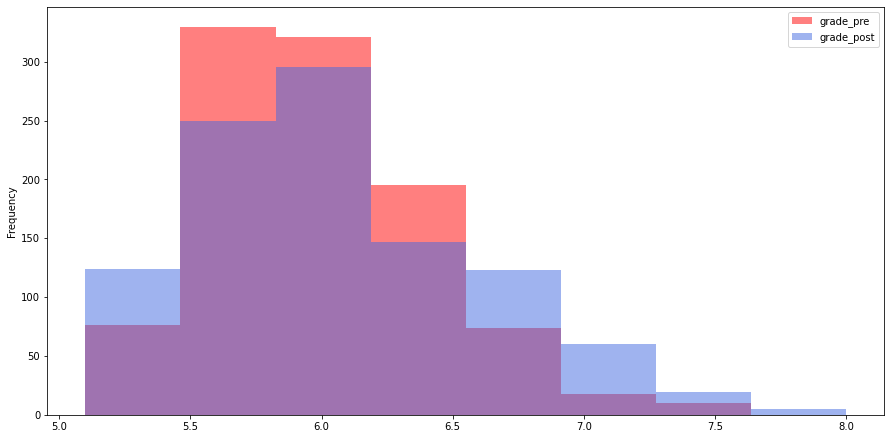

In [68]:
# Plotting the frequencies of draft grades
merged_df[['grade_pre', 'grade_post']].plot.hist(bins=8, figsize=(15,7.5), alpha=0.5, color=['red', 'royalblue'])

plt.show()

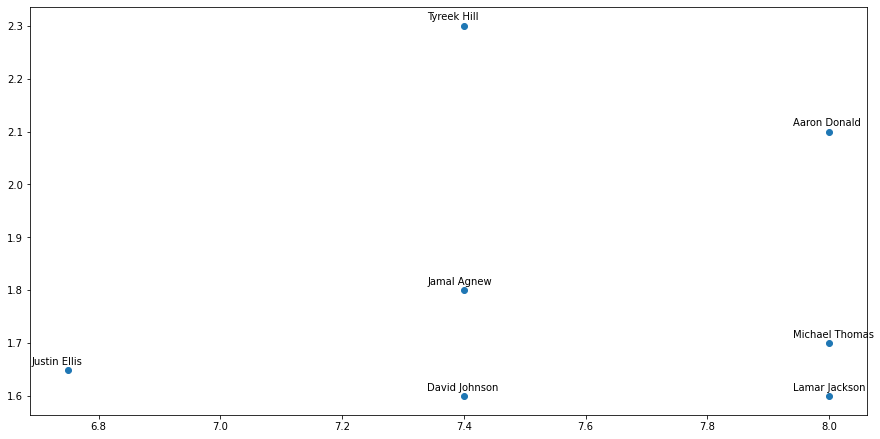

In [69]:
# Finding the players who's post draft grades increased by over 1.5
risers = merged_df.loc[merged_df.loc[:, 'grade_diff'] > 1.5]
x = risers['grade_post']
y = risers['grade_diff']

fig, ax = plt.subplots(figsize=(15,7.5))
ax.scatter(x, y)

for i, name in enumerate(risers.loc[:, 'name']):
    ax.annotate(s=name, xy=(x.iloc[i], y.iloc[i]), xytext=(x.iloc[i] - .06, y.iloc[i] + .01))

plt.show()

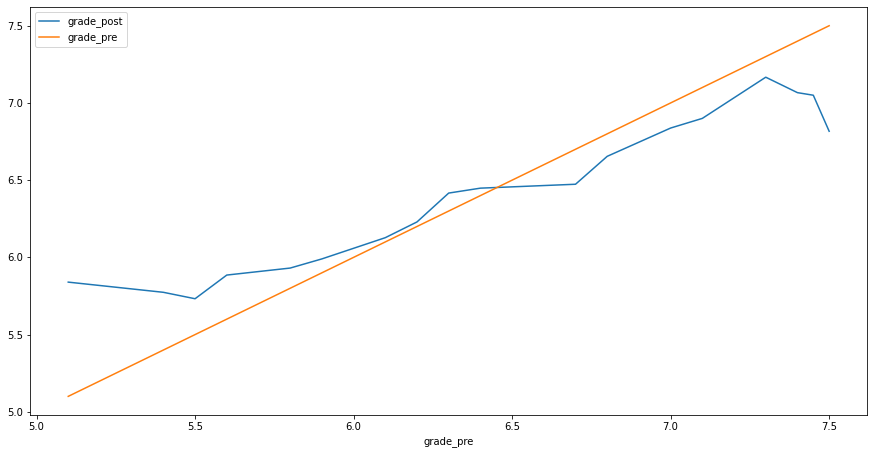

In [70]:
average_grades = merged_df.groupby('grade_pre').mean().drop(['year','grade_diff'], axis=1)
average_grades['grade_pre'] = average_grades.index
average_grades.plot(figsize=(15,7.5))

plt.show()